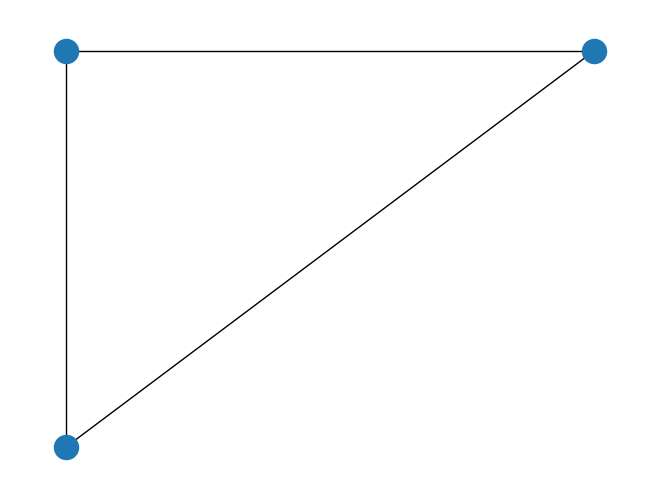

In [25]:
import pandas as pd
import networkx as nx

# ネットワークを可視化する
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 辺の設定
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

# 座標の設定
pos = {}
pos["nodeA"] = (0, 0)
pos["nodeB"] = (1, 1)
pos["nodeC"] = (0, 1)

# 描画
nx.draw(G, pos)

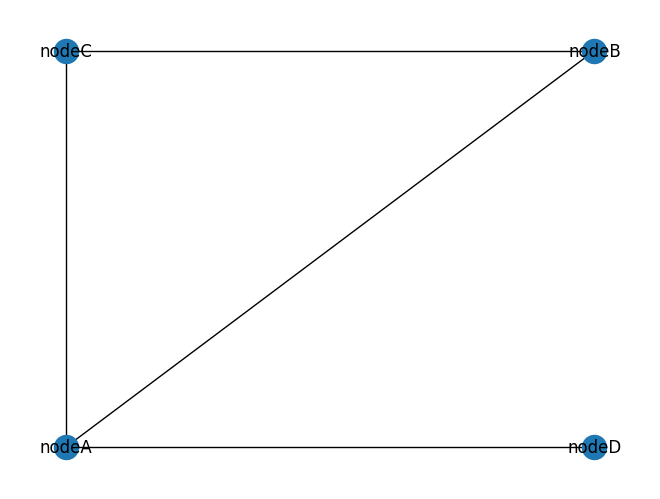

In [26]:
# ネットワークにノードを追加する
G.add_node("nodeD")

G.add_edge("nodeA", "nodeD")

pos["nodeD"] = (1, 0)

nx.draw(G, pos, with_labels=True)

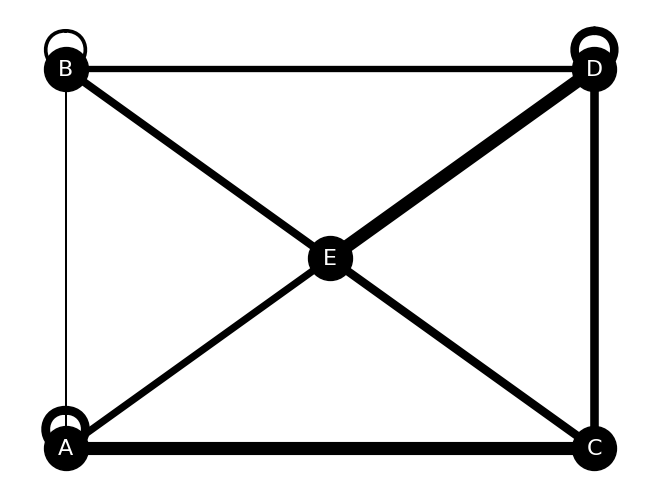

In [27]:
# ルートの重みづけを行う
# 1.データの読み込み
df_w = pd.read_csv("input/networkx/network_weight.csv")
df_p = pd.read_csv("input/networkx/network_pos.csv")

# 2.エッジの重みをリスト化する
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i, j] * size)

# 3.グラフオブジェクトの作成
G = nx.Graph()

# 4.頂点の設定
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

# 5.辺の設定
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

# 6.座標の設定
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p.loc[0, node], df_p.loc[1, node])

# 7.描画
nx.draw(
    G,
    pos,
    with_labels=True,
    font_size=16,
    node_size=1000,
    node_color="k",
    font_color="w",
    width=edge_weights,
)